## Free Energy Plots, varying Grid Sizes

The following cell plots the free energy of the system from benchmark problem 1a as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 0.5.

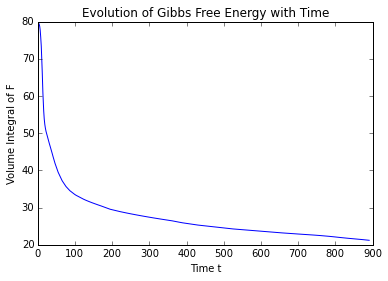

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.loadtxt('1a100x2.0.txt', usecols = [0]), np.loadtxt('1a100x2.0.txt', usecols = [1]))
plt.show()

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 600

# load and cut off values at given duration
times = np.loadtxt('1a50x4.0.txt', usecols = [0])
times50x4 = times[times < duration]
vals = np.loadtxt('1a50x4.0.txt', usecols = [1])
vals50x4 = vals[times < duration]

times = np.loadtxt('1a100x2.0.txt', usecols = [0])
times100x2 = times[times < duration]
vals = np.loadtxt('1a100x2.0.txt', usecols = [1])
vals100x2 = vals[times < duration]

times = np.loadtxt('1a200x1.0.txt', usecols = [0])
times200x1 = times[times < duration]
vals = np.loadtxt('1a200x1.0.txt', usecols = [1])
vals200x1 = vals[times < duration]

times = np.loadtxt('1a400x0.5.txt', usecols = [0])
print times
times400x5 = times[times < duration]
vals = np.loadtxt('1a400x0.5.txt', usecols = [1])
vals400x5= vals[times < duration]

[  0.00000000e+00   1.00000000e-02   2.10000000e-02 ...,   1.98069551e+02
   1.98229384e+02   1.98405200e+02]


## overlayed plots

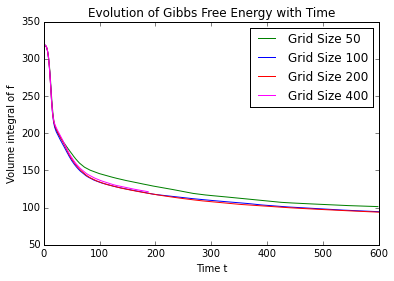

In [93]:
plt.figure(2)
plt.xlabel('Time t')
plt.ylabel('Volume integral of f')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(times50x4, 16.0*vals50x4, 'g', label = 'Grid Size 50')
plt.plot(times100x2, 4.0*vals100x2, 'b', label = 'Grid Size 100')
plt.plot(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.plot(times400x5, 0.25*vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run

In [9]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (180):
    ideal_times.append(i)

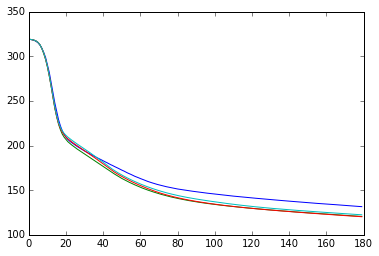

In [12]:
f50x4 = interp1d(times50x4, vals50x4)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)

y50x4 = 16*f50x4(ideal_times)
y100x2 = 4*f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = .25*f400x5(ideal_times)

# plot of interpolated free energies
plt.plot(ideal_times, y50x4, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5)
plt.show()

## Error Calculations

In [20]:
import numpy as np

diff_50 = []
diff_100 = []
diff_200 = []

for i in range (180):
    diff_50.append(np.absolute(y50x4[i]-y400x5[i]))
    diff_100.append(np.absolute(y100x2[i]-y400x5[i]))
    diff_200.append(np.absolute(y200x1[i]-y400x5[i]))

In [22]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,211.12
100 grid size: 501.18
200 grid size: 352.88


In [23]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 99.68
100 grid size: 41.35
200 grid size: 27.56


In [25]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 9.71
100 grid size: 5.67
200 grid size: 2.70


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

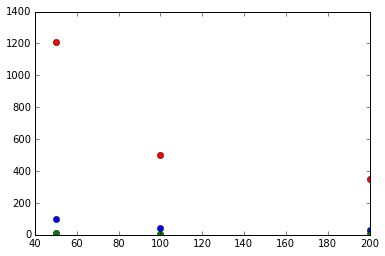

In [31]:
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], 'ro', [50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], 'bo', [50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], 'go')
plt.show()

In [55]:
print times50x4[40:50]
print times100x2[40:50]

[  4.42592556   4.87851811   5.37636992   5.92400692   6.52640761
   7.18904837   7.91795321   8.71974853   9.42532841  10.20146628]
[  4.42592556   4.87851811   5.37636992   5.92400692   6.52640761
   7.18904837   7.91795321   8.71974853   9.42532841  10.0462387 ]


In [5]:
np.loadtxt('1a50x4.0.txt', usecols = [1])

array([ 19.93991924,  19.93977373,  19.93961304, ...,   3.62729153,
         3.62724293,   3.62719959])

In [8]:
times = np.loadtxt('1a50x4.0.txt', usecols = [0])

In [9]:
times_reduced = times[times < 2000]

In [10]:
times_reduced

array([  0.00000000e+00,   1.00000000e-02,   2.10000000e-02, ...,
         1.99609493e+03,   1.99778186e+03,   1.99963747e+03])

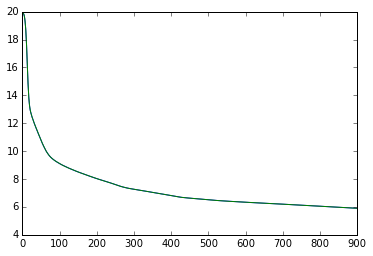

In [39]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (900):
    ideal_times.append(i)

f = interp1d(times50x4, vals50x4)
y_interp = f(ideal_times)
plt.plot(times50x4, vals50x4)
plt.plot(ideal_times, y_interp)
plt.show()

In [34]:
from scipy.interpolate import interp1d

x = np.array([0., 0.5, 2.0, 2.5])
x_interp = np.array([1.0, 1.5])
y = x**2

f = interp1d(x, y)
y_interp = f(x_interp)

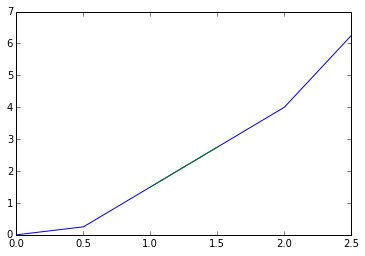

In [35]:
plt.plot(x, y)
plt.plot(x_interp, y_interp)
plt.show()